# 数据读取

In [1]:
import warnings;warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
traindata=pd.read_csv('train.csv')
testdata=pd.read_csv('test.csv')
# 读取训练集 测试集数据

In [ ]:
traindata.info()
print('-'*40)
testdata.info()
#查看训练和测试数据结构和缺失情况

In [2]:
traindata.describe()
#查看数字型变量（包含整型和浮点型）

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
traindata.describe(include=[np.object])
#查看字符串型变量

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beckwith, Mr. Richard Leonard",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


离散特征：Pclass,Sex,Embarked/ 连续特征：Age,Fare,SibSp,Parch/ 删除特征：Ticket,Name,Cabin/ 标签：Survived

# 离散特征分析

In [4]:
traindata[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Pclass1存活率显著高于Pclass2和Pclass3

In [5]:
traindata[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


女性存活率显著高于男性

In [6]:
traindata[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


C港口上船的乘客存活率高于其他两个港口上船的乘客

# 连续特征分析

In [7]:
traindata[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


兄弟姐妹配偶数和生存率的关系

In [8]:
traindata[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


孩子父母数和生存率的关系

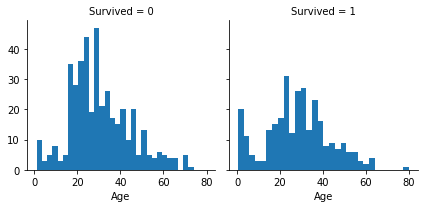

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(traindata,col='Survived')
g.map(plt.hist,'Age',bins=30)
plt.show()

年龄与存活人数，遇难人数柱状图

# 复合特征分析

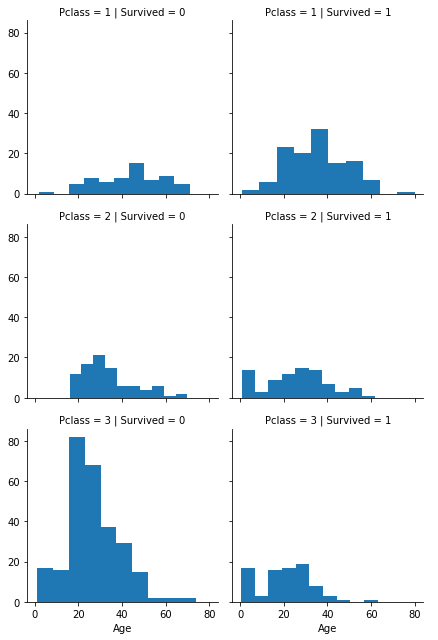

In [11]:
grid=sns.FacetGrid(traindata,col='Survived',row='Pclass')
grid.map(plt.hist,'Age')
grid.add_legend()
#客舱等级，年龄，存活率，柱状图（累计值）

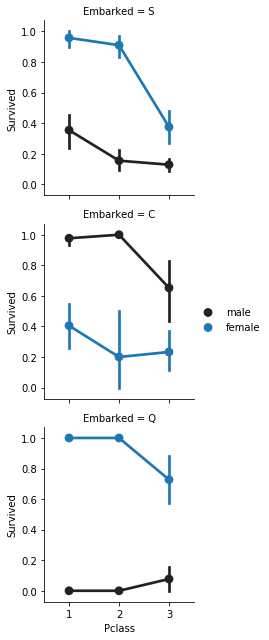

In [12]:
grid=sns.FacetGrid(traindata,row='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex')
grid.add_legend()
#港口，客舱等级，存活率，性别，点图连线（mean）

# 特征工程

新离散特征：姓名title

In [13]:
# traindata['Title']=traindata.Name.str.extract('([A-Za-z]+)\.',expand=False)
# traindata['Title']
split=traindata['Name'].str.split(',',expand=True)
split1=pd.DataFrame(split.iloc[:,1].str.split('.',expand=True).iloc[:,0])
split1
split1.rename(columns={0:"Title"},inplace=True)
traindata1=pd.concat([traindata,split1],axis=1)
traindata1.head()
#提取训练集名字title

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
split2=testdata['Name'].str.split(',',expand=True)
split3=pd.DataFrame(split2.iloc[:,1].str.split('.',expand=True).iloc[:,0])
split3
split3.rename(columns={0:"Title"},inplace=True)
testdata1=pd.concat([testdata,split3],axis=1)
testdata1.head()
#提取测试集名字title

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [15]:
pd.crosstab(traindata1['Title'],traindata1['Sex'])
#查看训练集名字title

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [16]:
traindata1['Title'].replace([' Capt',' Col',' Don',' Dr',' Jonkheer',' Lady',' Major',' Rev',' Sir',' the Countess'],'Rare',inplace=True)
traindata1['Title'].replace(' Mlle','Miss',inplace=True)
traindata1['Title'].replace(' Ms','Miss',inplace=True)
traindata1['Title'].replace(' Mme','Mrs',inplace=True)

traindata1['Title'].replace(' Master','Master',inplace=True)
traindata1['Title'].replace(' Miss','Miss',inplace=True)
traindata1['Title'].replace(' Mr','Mr',inplace=True)
traindata1['Title'].replace(' Mrs','Mrs',inplace=True)

traindata1[['Title','Survived']].groupby(['Title']).mean()
#修改训练集名字title保留五种

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [17]:
pd.crosstab(testdata1['Title'],testdata1['Sex'])
#查看测试集名字title

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [18]:
testdata1['Title'].replace([' Col',' Dona',' Dr',' Rev'],'Rare',inplace=True)
testdata1['Title'].replace(' Ms','Miss',inplace=True)


testdata1['Title'].replace(' Master','Master',inplace=True)
testdata1['Title'].replace(' Miss','Miss',inplace=True)
testdata1['Title'].replace(' Mr','Mr',inplace=True)
testdata1['Title'].replace(' Mrs','Mrs',inplace=True)

testdata1['Title'].value_counts()
#修改测试集名字title保留五种

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

# 填补空值

In [19]:
#根据性别，客舱等级划分六类乘客，根据六类乘客中位数填补空值
guess_age=np.zeros((2,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
traindata1['Sex'] = traindata1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
traindata1.head()

for i in range(0, 2):
        for j in range(1, 4):
            guess_df = traindata1[(traindata1['Sex'] == i) & (traindata1['Pclass'] == j)]['Age'].dropna()
            guess_age[i,j-1]=guess_df.median()
guess_age

for i in range(0, 2):
        for j in range(1, 4):
            traindata1.loc[ (traindata1.Age.isnull()) & (traindata1.Sex == i) & (traindata1.Pclass == j),'Age'] = guess_age[i,j-1]
traindata1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [21]:
#填补Embarked缺失值（基于Embarked众数）
traindata1['Embarked'] = traindata1['Embarked'].fillna(traindata1.Embarked.dropna().mode()[0])
traindata1[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=True)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


# 训练集特征筛选

In [22]:
traindata1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
traindata1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


In [23]:
traindata03=traindata1.iloc[:,1:]
traindata03.head()

traindata03dummy=pd.get_dummies(traindata03,columns=['Pclass','Sex','Embarked','Title'])
traindata03dummy.head()

train_y=traindata1['Survived']
train_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
traindata03dummy.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,22.0,1,0,7.2500,0,0,1,1,0,0,0,1,0,0,1,0,0
1,38.0,1,0,71.2833,1,0,0,0,1,1,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1,0,0,0
3,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,1,0,0,0,1,0,0,1,0,0


# 交叉验证，参数寻优

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
scores=cross_val_score(gbc,traindata03dummy,train_y,cv=5)
print("cross_validation_score:"+str(scores.mean()))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(traindata03dummy,train_y,random_state=0,stratify=train_y)
param_grid={'learning_rate':[0.1,0.2,0.3,0.4,0.5],'max_depth':[1,2,3,4,5]}
from sklearn.model_selection import GridSearchCV
grid_search1=GridSearchCV(GradientBoostingClassifier(n_estimators=100),param_grid,cv=5)
grid_search1.fit(x_train,y_train)
print("grid_search_score:"+str(grid_search1.score(x_test,y_test)))

cross_validation_score:0.83169742962855
grid_search_score:0.8251121076233184


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 测试集特征

In [26]:
testdata1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [27]:
testdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 29.4+ KB


In [28]:
guess_age1=np.zeros((2,3))
guess_age1

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
testdata1['Sex'] = testdata1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
testdata1.head()

for i in range(0, 2):
        for j in range(1, 4):
            guess_df1 = testdata1[(testdata1['Sex'] == i) & (testdata1['Pclass'] == j)]['Age'].dropna()
            guess_age1[i,j-1]=guess_df1.median()
guess_age1


for i in range(0, 2):
        for j in range(1, 4):
            testdata1.loc[ (testdata1.Age.isnull()) & (testdata1.Sex == i) & (testdata1.Pclass == j),'Age'] = guess_age1[i,j-1]
testdata1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [30]:
testdata2=testdata1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
testdata2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,Mr
1,3,1,47.0,1,0,7.0000,S,Mrs
2,2,0,62.0,0,0,9.6875,Q,Mr
3,3,0,27.0,0,0,8.6625,S,Mr
4,3,1,22.0,1,1,12.2875,S,Mrs


In [31]:
testdata2.Fare.fillna(testdata2['Fare'].mean(),inplace=True)
testdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
Title       418 non-null object
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 21.3+ KB


In [32]:
testdata2dummy=pd.get_dummies(testdata2,columns=['Pclass','Sex','Embarked','Title'])
testdata2dummy.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,34.5,0,0,7.8292,0,0,1,1,0,0,1,0,0,0,1,0,0
1,47.0,1,0,7.0000,0,0,1,0,1,0,0,1,0,0,0,1,0
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0,0,0,1,0,0
3,27.0,0,0,8.6625,0,0,1,1,0,0,0,1,0,0,1,0,0
4,22.0,1,1,12.2875,0,0,1,0,1,0,0,1,0,0,0,1,0


In [34]:
result=pd.DataFrame(grid_search1.predict(testdata2dummy))
result1=pd.DataFrame(testdata1.iloc[:,0])
result2=pd.concat([result1,result],axis=1)
result2.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
result2.to_csv('result2.csv')

# Kaggle结果

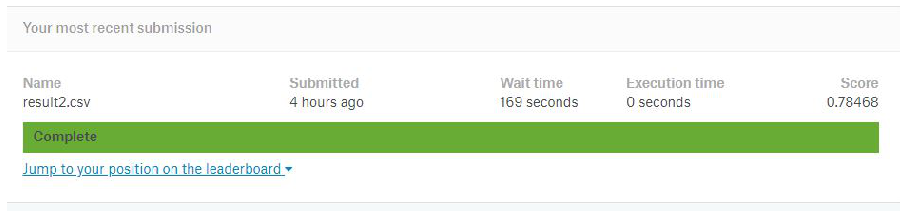

In [35]:
import matplotlib.image as mp
picture=mp.imread('001.jpg')
plt.figure(figsize=(16,25))
plt.imshow(picture)
plt.axis('off')
plt.show()

In [ ]:
traindata1['AgeBand'] = pd.cut(traindata1['Age'], 5)
traindata1[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

traindata1.loc[ traindata1['Age'] <= 16.336, 'Age'] = 0
traindata1.loc[(traindata1['Age'] > 16.336) & (traindata1['Age'] <= 32.252), 'Age'] = 1
traindata1.loc[(traindata1['Age'] > 32.252) & (traindata1['Age'] <= 48.168), 'Age'] = 2
traindata1.loc[(traindata1['Age'] > 48.168) & (traindata1['Age'] <= 64.084), 'Age'] = 3
traindata1.loc[ traindata1['Age'] > 64.084, 'Age']=4
traindata1
traindata1.to_excel('traindata1.xlsx')

traindata1= traindata1.drop(['AgeBand'], axis=1)
traindata1

traindata1['FareBand'] = pd.qcut(traindata1['Fare'], 4)
traindata1[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


traindata1.loc[ traindata1['Fare'] <= 7.91, 'Fare'] = 0
traindata1.loc[(traindata1['Fare'] > 7.91) & (traindata1['Fare'] <= 14.454), 'Fare'] = 1
traindata1.loc[(traindata1['Fare'] > 14.454) & (traindata1['Fare'] <= 31), 'Fare'] = 2
traindata1.loc[(traindata1['Fare'] > 31) & (traindata1['Fare'] <= 512.3292), 'Fare'] = 3

traindata1

traindata1=traindata1.drop(['FareBand'],axis=1)
traindata1.head()


traindata1['familynumber']=traindata1['SibSp']+traindata1['Parch']
traindata1.head()

traindata1['alone']=np.where(traindata1['familynumber']==0,1,0)
traindata1.head(15)

traindata1=traindata1.drop(['familynumber'],axis=1)
traindata1.head()

traindata1['Age']=traindata1['Age'].astype(int)
traindata1['Fare']=traindata1['Fare'].astype(int)
traindata1.info()
